In [1]:
import getpass
import os
if( os.system('klist | grep Default | grep alobanov@CERN.CH') ):
    os.system('echo %s | kinit alobanov' % getpass.getpass() )

In [2]:
import pandas as pd
import numpy as np

from root_pandas import read_root

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
mpl.rcParams['image.cmap'] = 'hot_r'

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [3]:
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic#, binned_statistic_2d
from scipy.special import erf
from scipy.stats import iqr

In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)

In [5]:
branches = [u'event', 
       u'rechit_layer','rechit_module', u'rechit_chip', u'rechit_channel', u'rechit_x', u'rechit_y', u'rechit_z',
       u'rechit_energy', u'rechit_amplitudeHigh', u'rechit_amplitudeLow', u'rechit_Tot', 'rechit_toaRise',
       'rechit_TS3High','rechit_TS3Low',  'rechit_TS2High','rechit_TS2Low']

rh_branches = [branch for branch in branches if "rechit" in branch]

In [6]:
#eosprefix = 'root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/prompt_reco/v2/'
#eosprefix = 'root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/prompt_reco/v3/'
#eosprefix = 'root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/prompt_reco/v5/'
#eosprefix = 'root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/prompt_reco/final/'
eosprefix = 'root://eoscms.cern.ch//eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v3/'

In [8]:
#run = 426
#run = 311
#run = 324 #muon
#run = 512 #pion
#run = 361 #ele
#run = 493 #ele
#run = 324 #muon
#run = 341
#run = 436 #20 gev ele
#run = 997 ele
run = 265 #100gev ele

fname = eosprefix + "ntuple_%i.root" %run

In [9]:
%%time
df_all = read_root(fname,key='rechitntupler/hits',columns = branches, flatten = rh_branches)

CPU times: user 9.89 s, sys: 12.5 s, total: 22.4 s
Wall time: 57 s


In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353185 entries, 0 to 8353184
Data columns (total 18 columns):
rechit_x                float32
rechit_y                float32
rechit_z                float32
rechit_amplitudeHigh    float32
rechit_channel          uint32
rechit_toaRise          uint16
rechit_TS3Low           float32
event                   uint32
rechit_energy           float32
rechit_chip             uint32
rechit_Tot              uint16
rechit_TS3High          float32
rechit_TS2High          float32
rechit_layer            uint32
rechit_amplitudeLow     float32
rechit_TS2Low           float32
rechit_module           uint32
__array_index           int64
dtypes: float32(10), int64(1), uint16(2), uint32(5)
memory usage: 573.6 MB


In [11]:
df_all.head()

,rechit_x,rechit_y,rechit_z,rechit_amplitudeHigh,rechit_channel,rechit_toaRise,rechit_TS3Low,event,rechit_energy,rechit_chip,rechit_Tot,rechit_TS3High,rechit_TS2High,rechit_layer,rechit_amplitudeLow,rechit_TS2Low,rechit_module,__array_index
0,0.000010,3.37559,13.32,53.312500,30,4,-3.0,1,1.246117,2,4,30.0,46.0,1,7.171875,-1.0,78,0
1,-1.948894,2.25039,13.32,705.000000,40,4,47.0,1,15.781047,1,4,526.0,591.0,1,84.500000,69.0,78,1
2,-1.948894,1.12519,13.32,77.906250,38,4,-4.0,1,1.717704,1,4,40.0,66.0,1,9.343750,1.0,78,2
3,3.897797,-4.50079,13.32,111.921875,22,4,-3.0,1,2.597305,3,4,43.0,119.0,1,12.808594,8.0,78,3
4,0.000010,4.50079,14.21,94.875000,58,4,1.0,1,2.292370,2,4,76.0,77.0,2,10.826172,4.0,90,4


In [12]:
#df_all.set_index('event', inplace=True)

In [13]:
sel = df_all.rechit_energy > 0.5
sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22))

df_sel = df_all[sel].copy()
df_sel.set_index('event', inplace=True)

In [14]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 5997675 entries, 1 to 9577
Data columns (total 17 columns):
rechit_x                float32
rechit_y                float32
rechit_z                float32
rechit_amplitudeHigh    float32
rechit_channel          uint32
rechit_toaRise          uint16
rechit_TS3Low           float32
rechit_energy           float32
rechit_chip             uint32
rechit_Tot              uint16
rechit_TS3High          float32
rechit_TS2High          float32
rechit_layer            uint32
rechit_amplitudeLow     float32
rechit_TS2Low           float32
rechit_module           uint32
__array_index           int64
dtypes: float32(10), int64(1), uint16(2), uint32(4)
memory usage: 434.7 MB


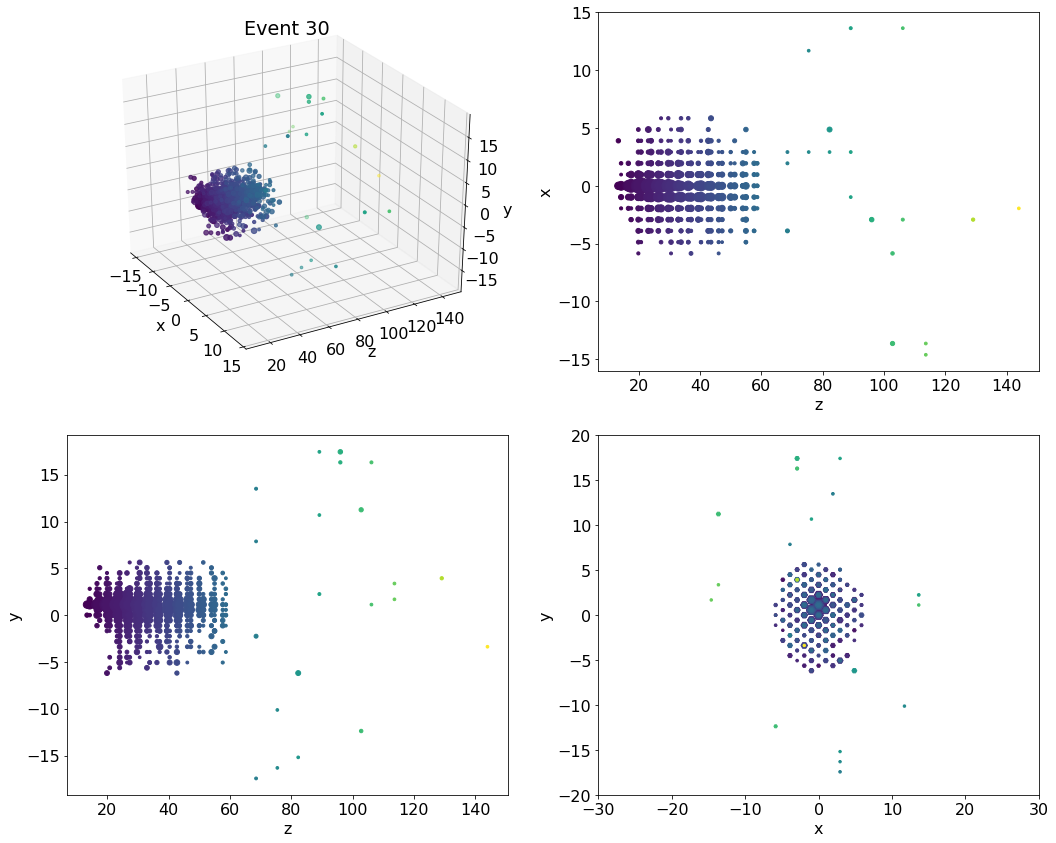

In [15]:
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

event = 30
df_xyz = df_sel.loc[event]
# sel = df_all.event == event
# sel &= df_all.rechit_energy > 0.3
#sel &= df_all.rechit_layer > 27
#df_xyz = df_all[sel]

cmap = 'viridis'

x = df_xyz.rechit_x
y = df_xyz.rechit_y
z = df_xyz.rechit_z
#z = df_xyz.rechit_layer

c = df_xyz.rechit_z
s = np.sqrt(df_xyz.rechit_energy)*10

m_style = 'o'
ax1.scatter(x, z, y, c = c, s = s, marker = m_style, cmap = cmap)
ax2.scatter(z, x, c = c, s = s, marker = m_style, cmap = cmap)
ax3.scatter(z, y, c = c, s = s, marker = m_style, cmap = cmap)
m_style = 'H'
ax4.scatter(x, y, c = c, s = s, marker = m_style, cmap = cmap)

    
figfname = 'event_%i.png' %event

ax1.set_xlabel('x'); ax1.set_ylabel('z'); ax1.set_zlabel('y')
ax2.set_xlabel('z'); ax2.set_ylabel('x')
ax3.set_xlabel('z'); ax3.set_ylabel('y')
ax4.set_xlabel('x'); ax4.set_ylabel('y')

ax4.set_ylim(-20,20)
ax4.set_xlim(-30,30)

# ax1.set_xlim(-40,40)
# ax1.set_zlim(-40,40)
# ax1.set_ylim(0,150)

#fig.suptitle('Event %i' % event)#, fontsize=16)
ax1.set_title('Event %i' % event)

plt.tight_layout()

# plt.savefig(outdirname + figfname)
# plt.close(fig)

ax1.view_init(30, 330)

In [16]:
def plot_event(event, savefig = False, outdir = None): 
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    df_xyz = df_sel.loc[event]
    cmap = 'viridis'

    x = df_xyz.rechit_x
    y = df_xyz.rechit_y
    #z = df_xyz.rechit_z; zlabel = 'z'
    z = df_xyz.rechit_layer; zlabel = 'Layer'

    c = df_xyz.rechit_z
    #s = np.sqrt(df_xyz.rechit_energy)*10
    s = df_xyz.rechit_energy

    m_style = 'o'
    ax1.scatter(x, z, y, c = c, s = s, marker = m_style, cmap = cmap)
    ax2.scatter(z, x, c = c, s = s, marker = m_style, cmap = cmap)
    ax3.scatter(z, y, c = c, s = s, marker = m_style, cmap = cmap)
    m_style = 'H'
    ax4.scatter(x, y, c = c, s = s, marker = m_style, cmap = cmap)


    figfname = 'event_%i.png' %event

    ax1.set_xlabel('x'); ax1.set_ylabel(zlabel); ax1.set_zlabel('y')
    ax2.set_xlabel(zlabel); ax2.set_ylabel('x')
    ax3.set_xlabel(zlabel); ax3.set_ylabel('y')
    ax4.set_xlabel('x'); ax4.set_ylabel('y')

    ax4.set_ylim(-20,20)
    ax4.set_xlim(-30,30)

    # ax1.set_xlim(-40,40)
    # ax1.set_zlim(-40,40)
    # ax1.set_ylim(0,150)

    #fig.suptitle('Event %i' % event)#, fontsize=16)
    ax1.set_title('Event %i' % event)

    plt.tight_layout()

    ax1.view_init(30, 330)    
    #plt.show()
    
    if savefig and outdir!=None :
        figname = "event_%s.png" % str(event).zfill(3)
        #print figname
        plt.savefig(outdir + figfname)
        plt.close(fig)

        return figname

    return 1

In [17]:
# bfname = os.path.basename(fname)
# outdir = "/eos/user/a/alobanov/www/HGCAL/testbeam/october2018/displays/" + bfname.replace('.root','_displays/')

# if not os.path.exists(outdir): os.makedirs(outdir)

In [18]:
# event = 11
# figname = plot_event(event, savefig = True, outdir = outdir)

# # figname = "event_%i.png" %event
# # plt.savefig(outdir + figfname)
# # plt.close(fig)

In [19]:
# for event in range(1,50):
#     fig = plot_event(event, savefig = True, outdir = outdir)

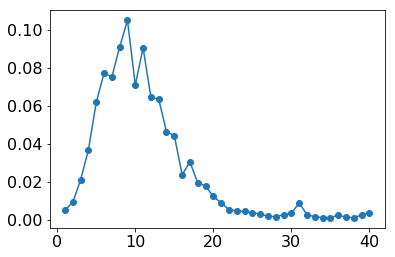

In [20]:
sel = df_all.rechit_energy > 1
sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22))

tot_sum = df_all[sel].groupby(['event'])['rechit_energy'].sum()
lay_sum = df_all[sel].groupby(['event','rechit_layer'])['rechit_energy'].sum()
plt.plot((lay_sum/tot_sum).reset_index().groupby('rechit_layer')['rechit_energy'].mean(), 'o-')

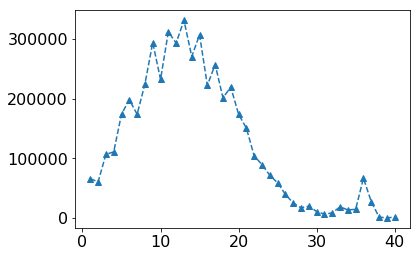

In [21]:
sel = df_all.rechit_energy > 1
sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22))

plt.plot(df_all[sel].groupby('rechit_layer')['rechit_energy'].size(), '^--')

In [22]:
%%time
totE = df_sel.groupby('event')['rechit_energy'].sum()

CPU times: user 131 ms, sys: 66 ms, total: 197 ms
Wall time: 194 ms


In [23]:
sel = df_sel.rechit_layer < 29
df_sel.loc[sel,'rechit_energy_w'] = df_sel.loc[sel,'rechit_energy'] * 1 #if df_sel.rechit_layer < 29 else * 2.5

sel = df_sel.rechit_layer > 28
df_sel.loc[sel,'rechit_energy_w'] = df_sel.loc[sel,'rechit_energy'] * 2.5

sel = df_sel.rechit_layer < 29
df_sel.loc[sel,'rechit_energy'] = df_sel.loc[sel,'rechit_energy'] * 1 #if df_sel.rechit_layer < 29 else * 2.5

sel = df_sel.rechit_layer > 28
df_sel.loc[sel,'rechit_energy'] = df_sel.loc[sel,'rechit_energy'] * 2.5

In [24]:
totEw = df_sel.groupby('event')['rechit_energy_w'].sum()

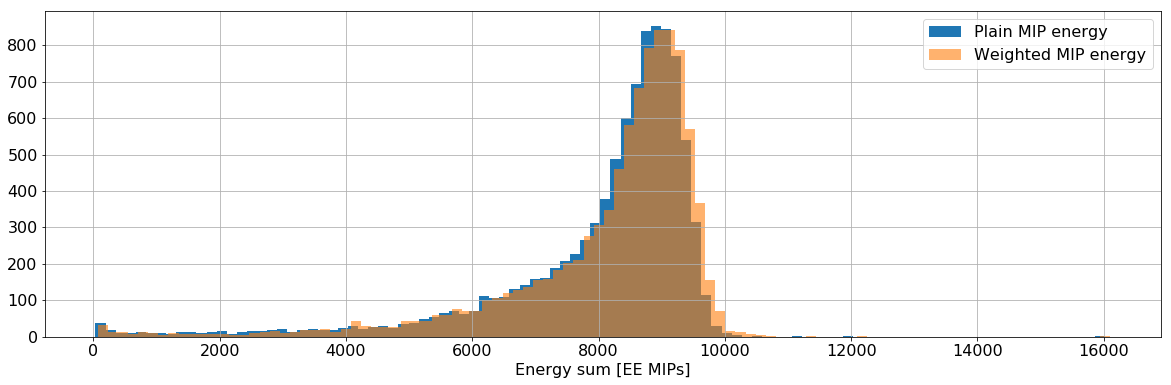

In [25]:
fig = plt.figure(figsize = (20,6))

r = plt.hist(totE, 100, label = 'Plain MIP energy')
r = plt.hist(totEw, 100, alpha = 0.6, label = 'Weighted MIP energy')

plt.xlabel('Energy sum [EE MIPs]')
plt.legend()
plt.grid()

In [26]:
df_sel['x_timesE'] = df_sel.rechit_energy * df_sel.rechit_x
df_sel['y_timesE'] = df_sel.rechit_energy * df_sel.rechit_y
df_sel['z_timesE'] = df_sel.rechit_energy * df_sel.rechit_z

In [27]:
# totE = df_sel.groupby('event')['rechit_energy'].sum()
# bary_x = df_sel.groupby('event')['rechit_x'].mean()
# bary_y = df_sel.groupby('event')['rechit_y'].mean()
# bary_z = df_sel.groupby('event')['rechit_z'].mean()

In [28]:
totE = df_sel.groupby('event')['rechit_energy'].sum()
bary_x = df_sel.groupby('event')['x_timesE'].sum()/totE
bary_y = df_sel.groupby('event')['y_timesE'].sum()/totE
bary_z = df_sel.groupby('event')['z_timesE'].sum()/totE

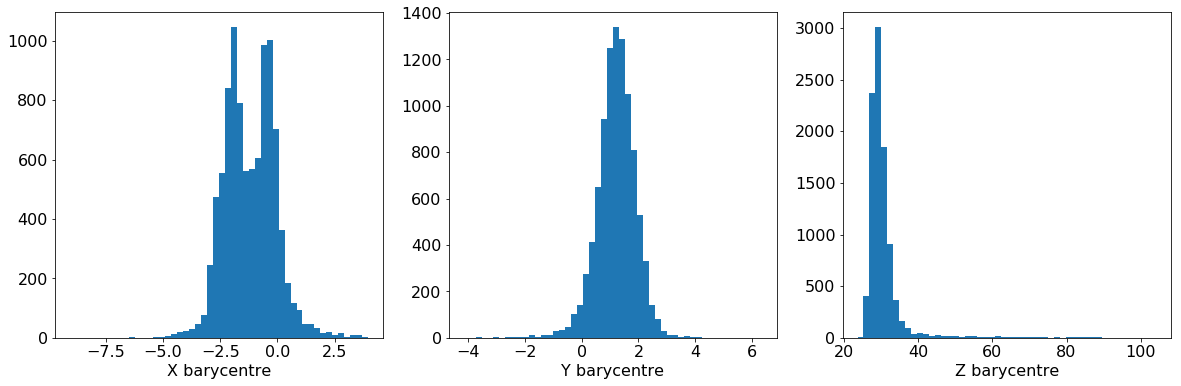

In [29]:
fig = plt.figure(figsize = (20,6))

plt.subplot(131)
plt.hist(bary_x, 50)
plt.xlabel('X barycentre')

plt.subplot(132)
plt.hist(bary_y, 50)
plt.xlabel('Y barycentre')

plt.subplot(133)
plt.hist(bary_z, 50)
plt.xlabel('Z barycentre')

plt.show()

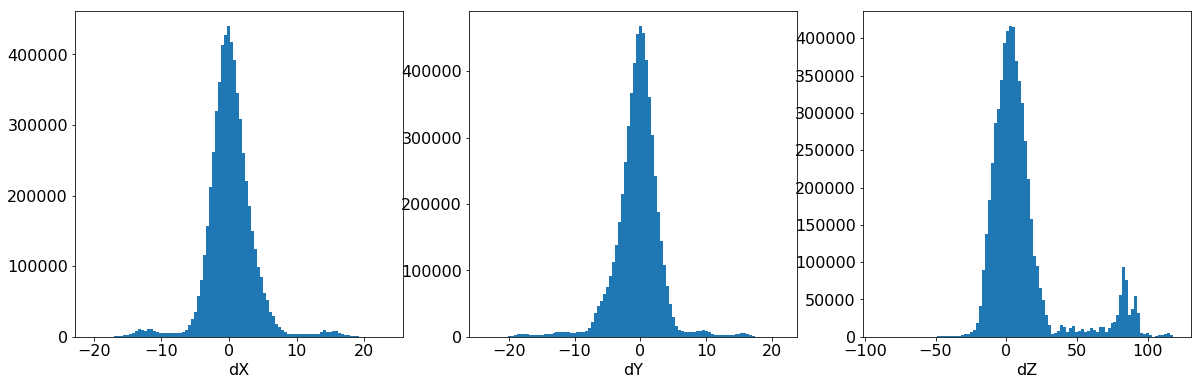

In [30]:
fig = plt.figure(figsize = (20,6))

plt.subplot(131)
plt.hist((df_sel['rechit_x'] - bary_x),100)
plt.xlabel('dX')

plt.subplot(132)
plt.hist((df_sel['rechit_y'] - bary_y),100)
plt.xlabel('dY')

plt.subplot(133)
plt.hist((df_sel['rechit_z'] - bary_z),100)
plt.xlabel('dZ')

plt.show()

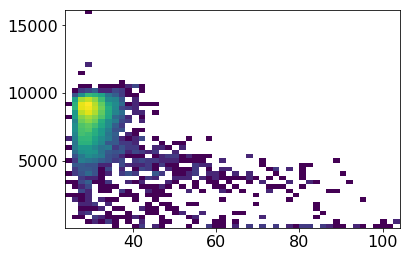

In [31]:
plt.hist2d(bary_z,totE,50, cmap = 'viridis', norm = LogNorm())
plt.show()

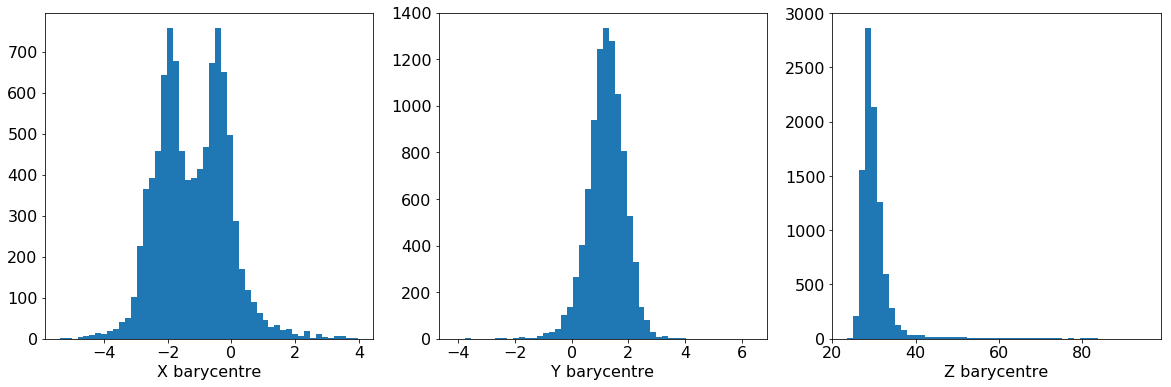

In [32]:
fig = plt.figure(figsize = (20,6))

sel = totE > 1500

plt.subplot(131)
plt.hist(bary_x[sel], 50)
plt.xlabel('X barycentre')

plt.subplot(132)
plt.hist(bary_y[sel], 50)
plt.xlabel('Y barycentre')

plt.subplot(133)
plt.hist(bary_z[sel], 50)
plt.xlabel('Z barycentre')

plt.show()

In [33]:
dx = df_sel['rechit_x'] - bary_x
dy = df_sel['rechit_y'] - bary_y
dz = df_sel['rechit_z'] - bary_z

In [34]:
dr = np.hypot(dx,dy)

In [35]:
efrac = df_sel['rechit_energy_w']/totEw

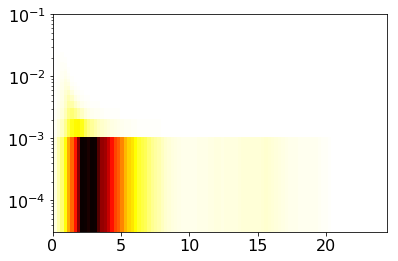

In [36]:
sel = efrac < 0.1
sel &= totE > 1000

#biny = np.logspace(-5,-1, 100)
biny = 100

ret = plt.hist2d(dr[sel], efrac[sel], (100, biny))#, norm = LogNorm())
plt.yscale('log')

Text(0,0.5,u'dY')

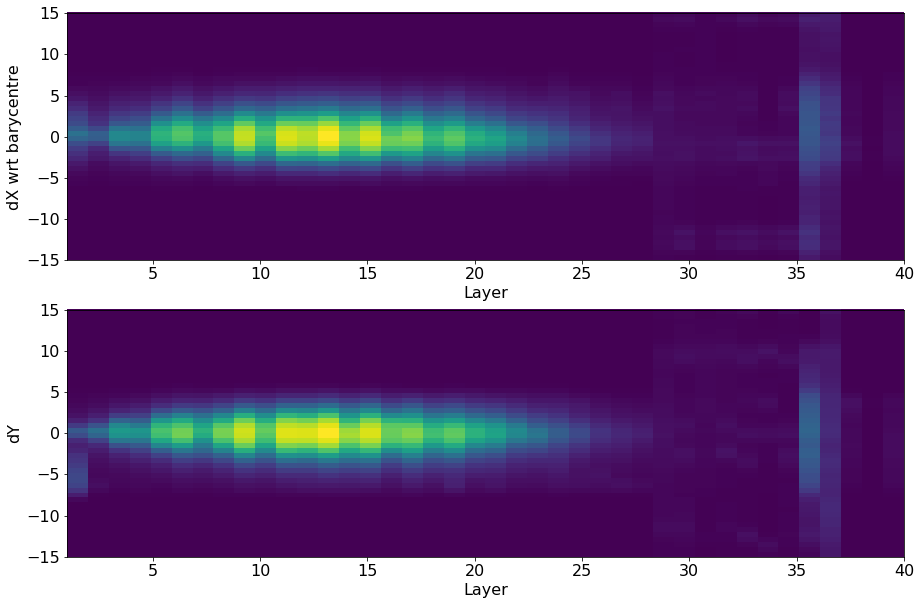

In [37]:
fig = plt.figure(figsize = (15,10))

cmap = 'viridis'

plt.subplot(211)
sel = abs(dx) < 15
ret = plt.hist2d(df_sel[sel].rechit_layer, dx[sel], (40,50), cmap = cmap)
plt.xlabel('Layer')
plt.ylabel('dX wrt barycentre')

plt.subplot(212)
sel = abs(dy) < 15
ret = plt.hist2d(df_sel[sel].rechit_layer, dy[sel], (40,50), cmap = cmap)
plt.xlabel('Layer')
plt.ylabel('dY')

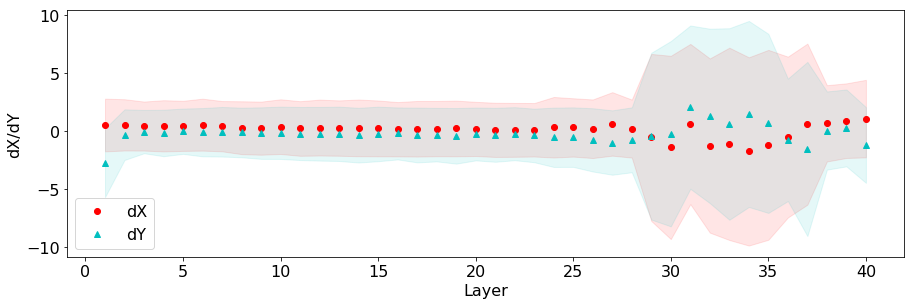

In [38]:
fig = plt.figure(figsize = (15,10))

cmap = 'viridis'

plt.subplot(211)
sel = abs(dx) < 15
x = df_sel[sel].rechit_layer
y = dx[sel]

#ret = plt.hist2d(df_sel[sel].rechit_layer, dx[sel], (40,50), cmap = cmap)
x_mean,y_mean = binned_statistic(x, [x,y], bins=40, statistic='mean').statistic
plt.plot(x_mean,y_mean, 'ro', label = 'dX')
y_std = binned_statistic(x, y, bins=40, statistic='std').statistic
plt.fill_between(x_mean,y_mean-y_std,y_mean+y_std, alpha = 0.1, color = 'r')

# plt.xlabel('Layer')
# plt.ylabel('dX wrt barycentre')

#plt.subplot(212)
sel = abs(dy) < 15
x = df_sel[sel].rechit_layer
y = dy[sel]

#ret = plt.hist2d(df_sel[sel].rechit_layer, dy[sel], (40,50), cmap = cmap)
x_mean,y_mean = binned_statistic(x, [x,y], bins=40, statistic='mean').statistic
plt.plot(x_mean,y_mean, 'c^', label = 'dY')

y_std = binned_statistic(x, y, bins=40, statistic='std').statistic
plt.fill_between(x_mean,y_mean-y_std,y_mean+y_std, alpha = 0.1, color = 'c')

plt.xlabel('Layer')
plt.ylabel('dX/dY')

plt.legend(loc = 'lower left')
plt.show()

In [39]:
sel = df_sel.rechit_layer < 29
bary_x_EE = df_sel[sel].groupby('event')['rechit_x'].mean()
bary_y_EE = df_sel[sel].groupby('event')['rechit_y'].mean()
bary_z_EE = df_sel[sel].groupby('event')['rechit_z'].mean()

sel = df_sel.rechit_layer > 28
sel &= df_sel.rechit_layer < 40-3
bary_x_FH = df_sel[sel].groupby('event')['rechit_x'].mean()
bary_y_FH = df_sel[sel].groupby('event')['rechit_y'].mean()
bary_z_FH = df_sel[sel].groupby('event')['rechit_z'].mean()

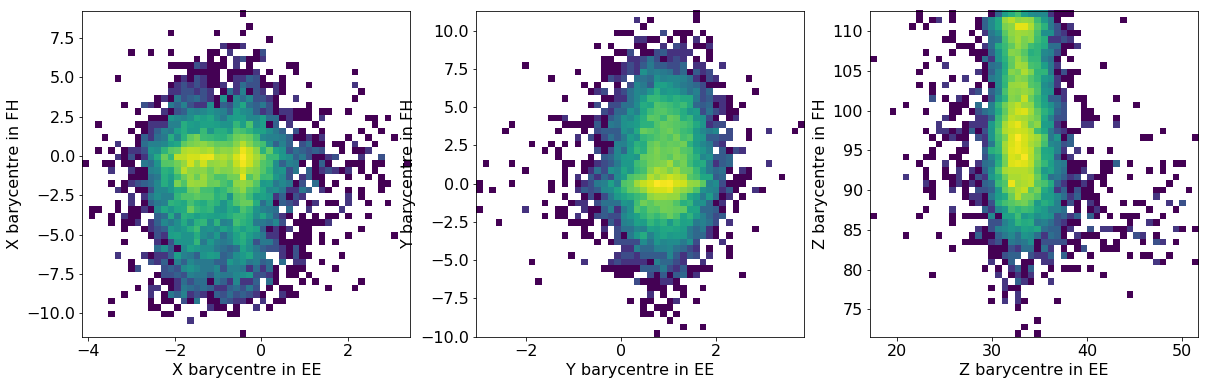

In [40]:
fig = plt.figure(figsize = (20,6))
cmap = 'viridis'

plt.subplot(131)
plt.hist2d(bary_x_EE, bary_x_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in EE')
plt.ylabel('X barycentre in FH')

plt.subplot(132)
plt.hist2d(bary_y_EE, bary_y_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Y barycentre in EE')
plt.ylabel('Y barycentre in FH')

plt.subplot(133)
plt.hist2d(bary_z_EE, bary_z_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Z barycentre in EE')
plt.ylabel('Z barycentre in FH')

plt.show()

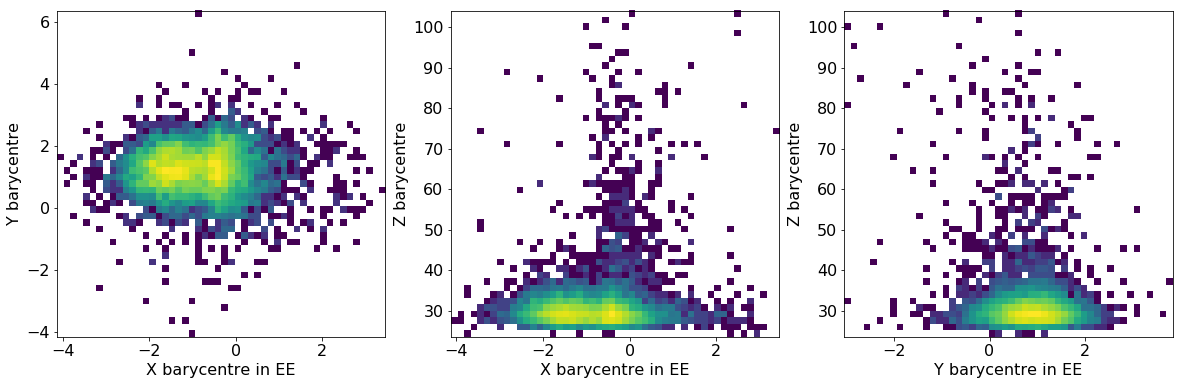

In [41]:
fig = plt.figure(figsize = (20,6))
cmap = 'viridis'

plt.subplot(131)
plt.hist2d(bary_x_EE, bary_y, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in EE')
plt.ylabel('Y barycentre')

plt.subplot(132)
plt.hist2d(bary_x_EE, bary_z, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in EE')
plt.ylabel('Z barycentre')

plt.subplot(133)
plt.hist2d(bary_y_EE, bary_z, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Y barycentre in EE')
plt.ylabel('Z barycentre')

plt.show()

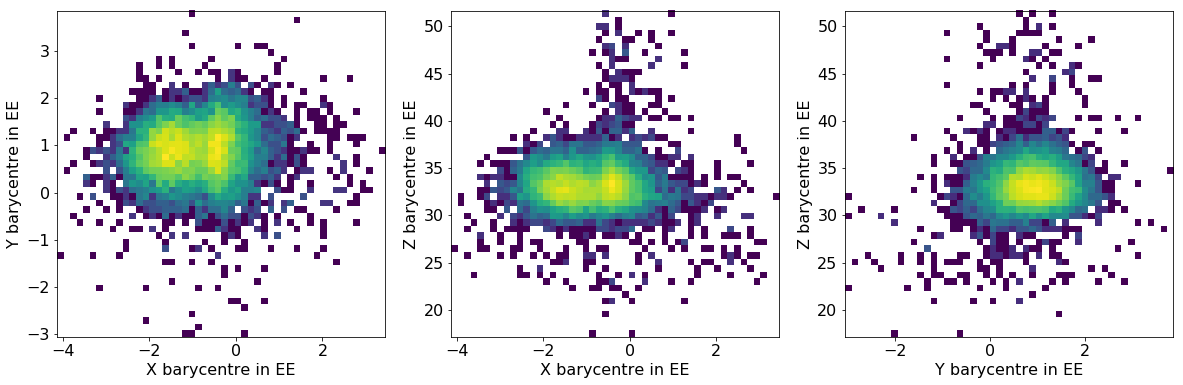

In [42]:
fig = plt.figure(figsize = (20,6))
cmap = 'viridis'

plt.subplot(131)
plt.hist2d(bary_x_EE, bary_y_EE, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in EE')
plt.ylabel('Y barycentre in EE')

plt.subplot(132)
plt.hist2d(bary_x_EE, bary_z_EE, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in EE')
plt.ylabel('Z barycentre in EE')

plt.subplot(133)
plt.hist2d(bary_y_EE, bary_z_EE, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Y barycentre in EE')
plt.ylabel('Z barycentre in EE')

plt.show()

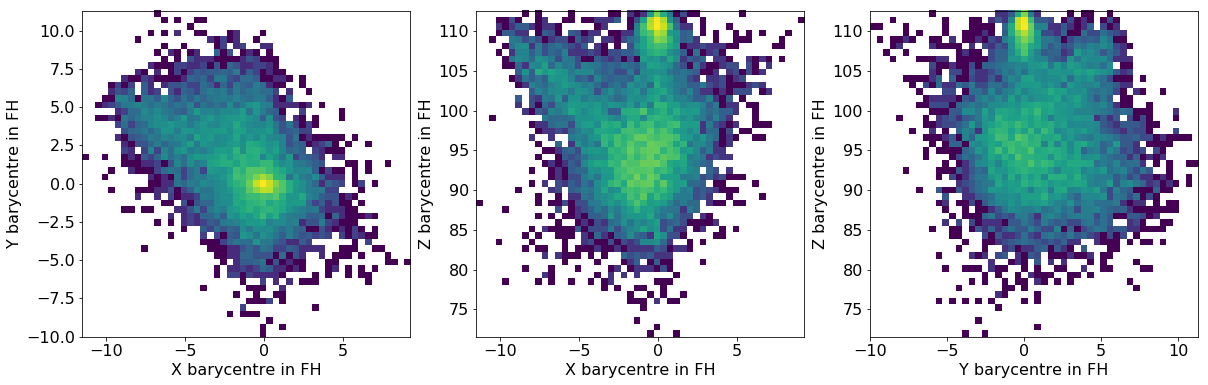

In [43]:
fig = plt.figure(figsize = (20,6))
#cmap = 'OrRd'
cmap = 'viridis'

plt.subplot(131)
plt.hist2d(bary_x_FH, bary_y_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in FH')
plt.ylabel('Y barycentre in FH')

plt.subplot(132)
plt.hist2d(bary_x_FH, bary_z_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('X barycentre in FH')
plt.ylabel('Z barycentre in FH')

plt.subplot(133)
plt.hist2d(bary_y_FH, bary_z_FH, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Y barycentre in FH')
plt.ylabel('Z barycentre in FH')

plt.show()

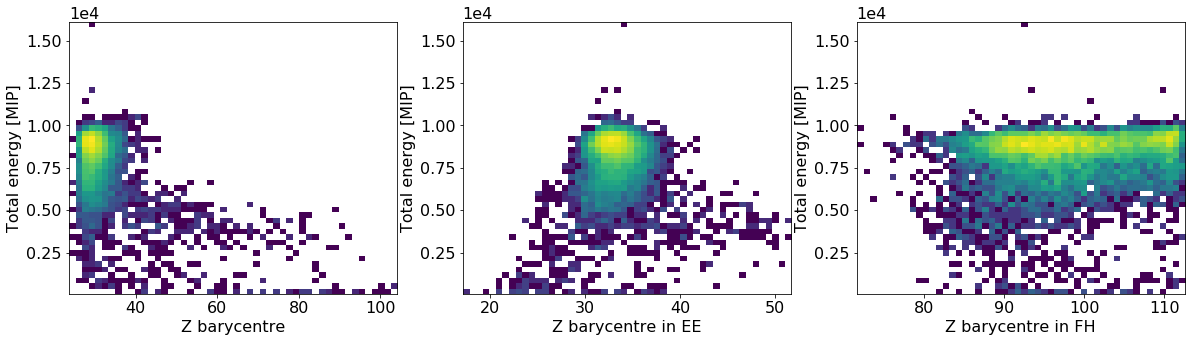

In [44]:
fig = plt.figure(figsize = (20,5))
cmap = 'viridis'

y = totE

plt.subplot(131)
plt.hist2d(bary_z, y, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Z barycentre')
plt.ylabel('Total energy [MIP]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))

plt.subplot(132)
plt.hist2d(bary_z_EE, y, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Z barycentre in EE')
plt.ylabel('Total energy [MIP]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))

plt.subplot(133)
plt.hist2d(bary_z_FH, y, 50, cmap = cmap, norm = LogNorm())
plt.xlabel('Z barycentre in FH')
plt.ylabel('Total energy [MIP]')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))

plt.show()

Text(0,0.5,u'delta R wrt x/y barycentre')

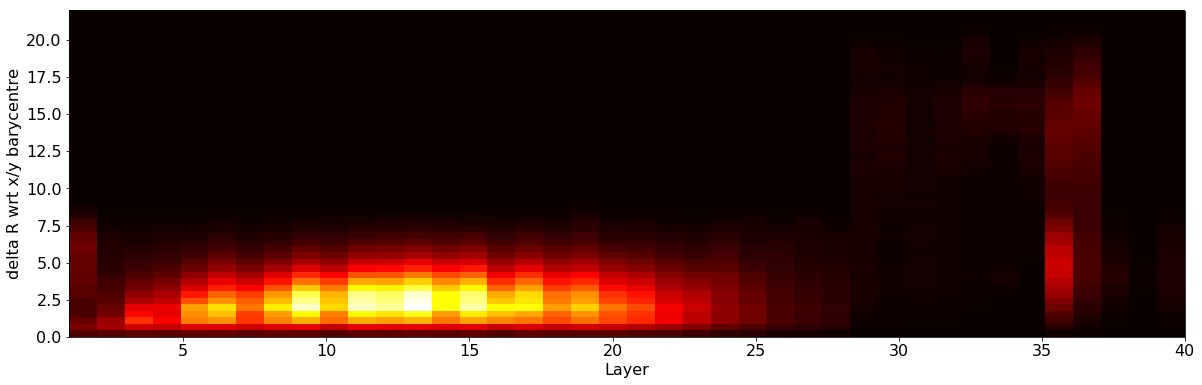

In [45]:
fig = plt.figure(figsize = (20,6))

sel = dr < 22
ret = plt.hist2d(df_sel.rechit_layer[sel], dr[sel], (40,50), cmap = "hot")#, norm = LogNorm())
plt.xlabel('Layer')
plt.ylabel('delta R wrt x/y barycentre')

In [46]:
dx_FH = df_sel['rechit_x'] - bary_x_FH
dy_FH = df_sel['rechit_y'] - bary_y_FH
dz_FH = df_sel['rechit_z'] - bary_z_FH

In [47]:
dr_FH = np.hypot(dx_FH,dy_FH)

Text(0,0.5,u'delta R wrt x/y barycentre')

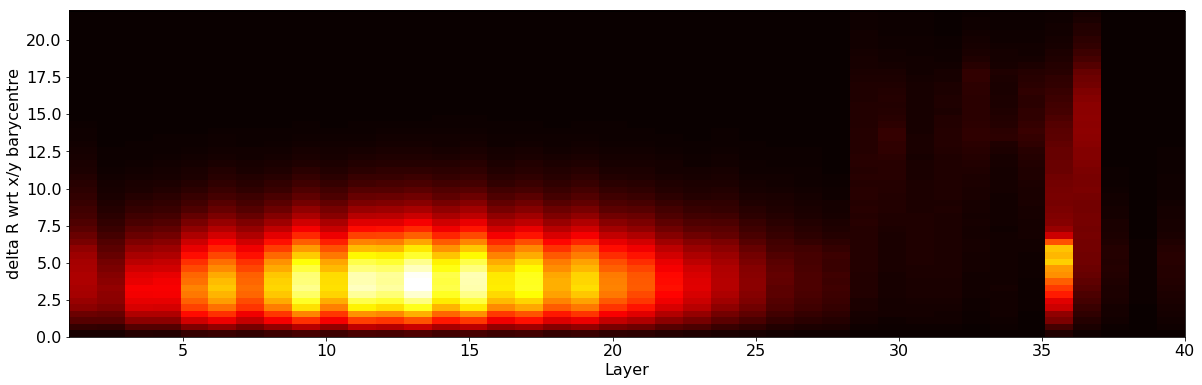

In [48]:
fig = plt.figure(figsize = (20,6))

sel = dr_FH < 22
ret = plt.hist2d(df_sel.rechit_layer[sel], dr_FH[sel], (40,50), cmap = "hot")
plt.xlabel('Layer')
plt.ylabel('delta R wrt x/y barycentre')

Text(0,0.5,u'delta Z wrt z barycentre')

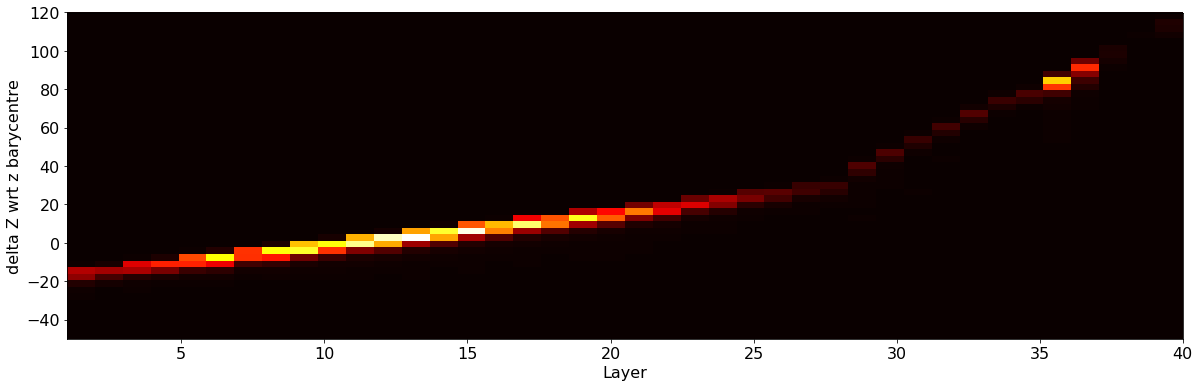

In [49]:
fig = plt.figure(figsize = (20,6))

sel = dz > -50
ret = plt.hist2d(df_sel.rechit_layer[sel], dz[sel], (40,50), cmap = "hot")
plt.xlabel('Layer')
plt.ylabel('delta Z wrt z barycentre')

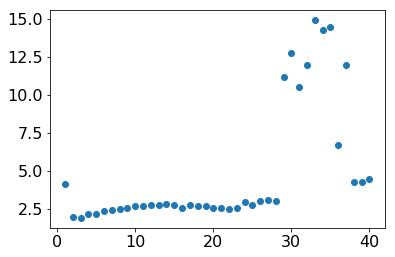

In [50]:
sel = dr < 50

x = df_sel.rechit_layer[sel]
y = dr[sel]

x_mean,y_mean = binned_statistic(x, [x,y], bins=40, statistic='median').statistic
plt.plot(x_mean,y_mean, 'o')

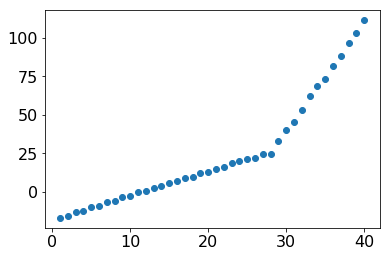

In [51]:
sel = dz > -50

x = df_sel.rechit_layer[sel]
y = dz[sel]

x_mean,y_mean = binned_statistic(x, [x,y], bins=40, statistic='mean').statistic
plt.plot(x_mean,y_mean, 'o')

In [52]:
sel = dz > -50

x = df_sel.rechit_z[sel]
y = dz[sel]

x_mean,y_mean = binned_statistic(x, [x,y], bins=len(df_sel.rechit_z[sel].unique()), statistic='mean').statistic

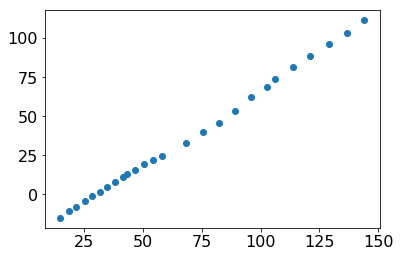

In [53]:
plt.plot(x_mean,y_mean, 'o')

In [54]:
sel = df_sel.rechit_layer > 28
#sel &= df_sel.rechit_layer > 28
mean_dz = dz[sel].groupby('event').mean()

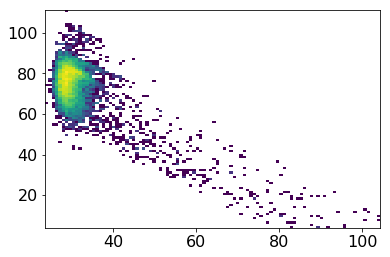

In [55]:
ret = plt.hist2d(bary_z, mean_dz, 100, cmap = 'viridis', norm = LogNorm())

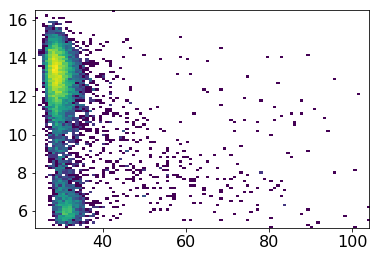

In [56]:
sel = df_sel.rechit_layer > 28
sel &= df_sel.rechit_layer < 40-3
mean_dr = dr[sel].groupby('event').mean()

ret = plt.hist2d(bary_z, mean_dr, 100, cmap = 'viridis', norm = LogNorm())

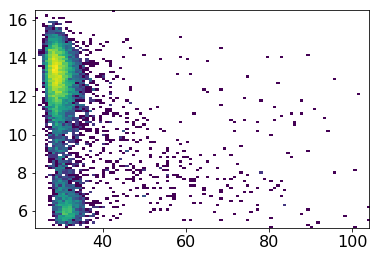

In [57]:
sel = df_sel.rechit_layer > 28
sel &= df_sel.rechit_layer < 40-3
mean_dr = dr[sel].groupby('event').mean()

ret = plt.hist2d(bary_z, mean_dr, 100, cmap = 'viridis', norm = LogNorm())

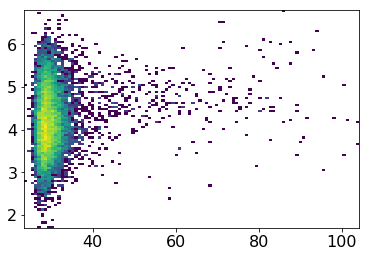

In [58]:
sel = df_sel.rechit_layer > 28
sel &= df_sel.rechit_layer < 40-3
dr_std = dr[sel].groupby('event').std()

ret = plt.hist2d(bary_z, dr_std, 100, cmap = 'viridis', norm = LogNorm())

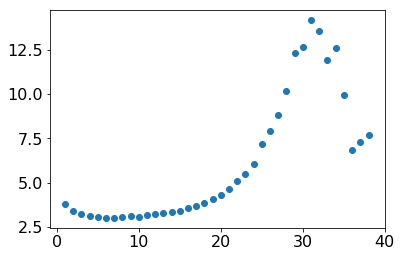

In [59]:
sel = dz > -50

x = df_sel.rechit_layer[sel]
y = dz[sel]

bins = range(40)
x_mean,y_mean = binned_statistic(x, [x,y], bins=bins, statistic='mean').statistic
y_std = binned_statistic(x, y, bins=bins, statistic='std').statistic
plt.plot(x_mean,y_std, 'o')

In [60]:
sel = dz > -50

x = df_sel.rechit_z[sel]
y = dz[sel]

bins = 100

x_mean,y_mean = binned_statistic(x, [x,y], bins=bins, statistic='mean').statistic
y_std = binned_statistic(x, y, bins=bins, statistic='std').statistic

In [61]:
sel = ~np.isnan(y_mean)# & ~np.isnan(y_std)
x_mean = x_mean[sel]
y_mean = y_mean[sel]
y_std = y_std[sel]

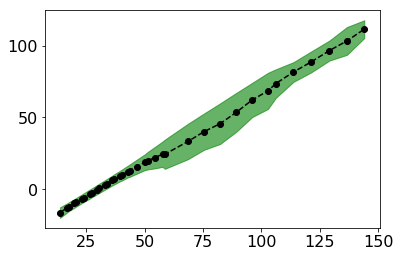

In [62]:
plt.plot(x_mean,y_mean, 'ko--')
plt.fill_between(x_mean,y_mean-y_std,y_mean+y_std, alpha = 0.6, color = 'g')

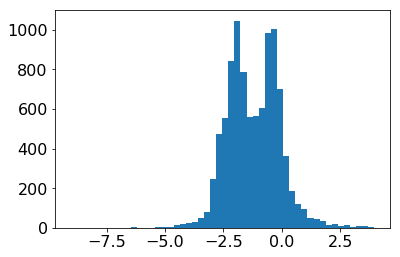

In [63]:
r = plt.hist(bary_x, 50)

In [64]:
sel = bary_x > -3

x = df_sel.rechit_z[sel]
y = dr[sel]

bins = 100

x_mean,y_mean = binned_statistic(x, [x,y], bins=bins, statistic='mean').statistic
y_std = binned_statistic(x, y, bins=bins, statistic='std').statistic

sel = ~np.isnan(y_mean)# & ~np.isnan(y_std)
x_mean = x_mean[sel]; y_mean = y_mean[sel]; y_std = y_std[sel]

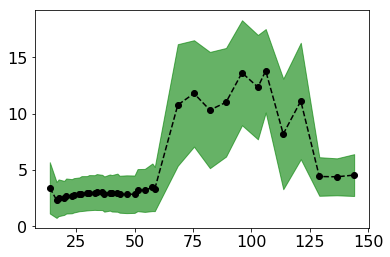

In [65]:
plt.plot(x_mean,y_mean, 'ko--')
plt.fill_between(x_mean,y_mean-y_std,y_mean+y_std, alpha = 0.6, color = 'g')

In [66]:
df_all['tot_hit'] = df_all['rechit_Tot'] > 4
#df_all['toa_hit'] = df_all['rechit_toaRise'] > 4

Text(0.5,1,u'FH occupancy')

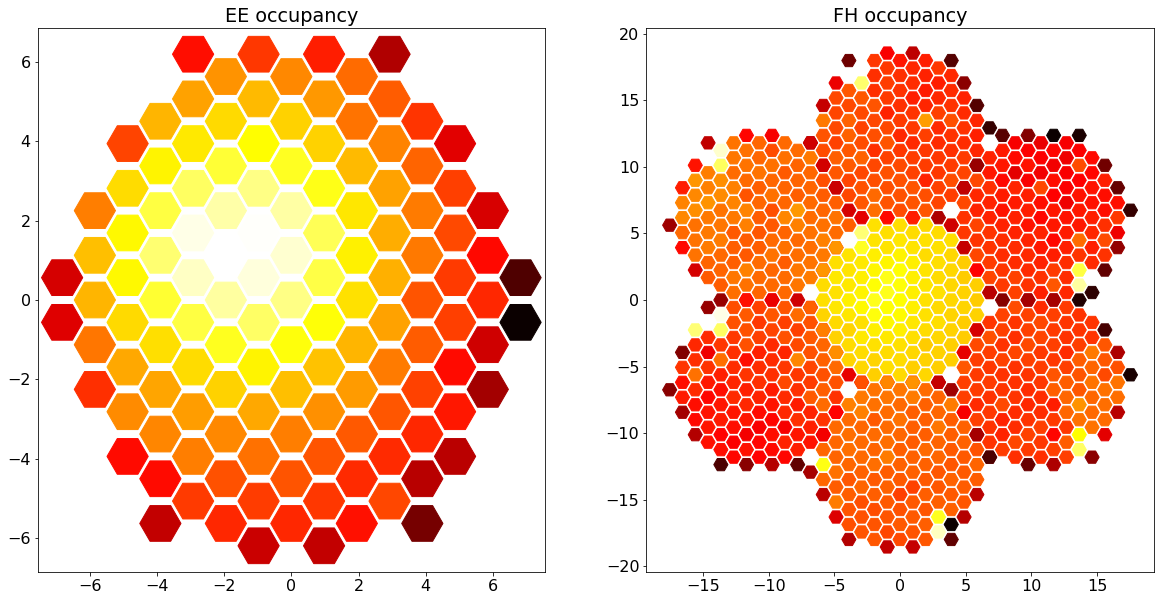

In [67]:
plt.figure(figsize = (20,10))

cmap = 'hot'
mstyle = 'H'

zval = 'rechit_energy'
#zval = 'tot_hit'

plt.subplot(121)
sel = df_all.rechit_layer < 25
sel &= df_all.rechit_layer > 20
sel &= df_all.rechit_energy > .5
sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))
cnts = df_all[sel].groupby(['rechit_x','rechit_y'])[zval].sum().reset_index()

c = np.log(cnts[zval])
#c = cnts[zval]

plt.scatter(cnts.rechit_x, cnts.rechit_y, c = c, marker = mstyle, s = 1700, cmap = cmap)

plt.title('EE occupancy')

plt.subplot(122)
sel = df_all.rechit_layer > 28
#sel &= df_all.rechit_layer < 35
sel &= df_all.rechit_energy > .5
sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))
cnts = df_all[sel].groupby(['rechit_x','rechit_y'])[zval].sum().reset_index()

c = np.log(cnts[zval])
#c = cnts[zval]

plt.scatter(cnts.rechit_x, cnts.rechit_y, c = c, marker = mstyle, s = 200, cmap = cmap)

plt.title('FH occupancy')

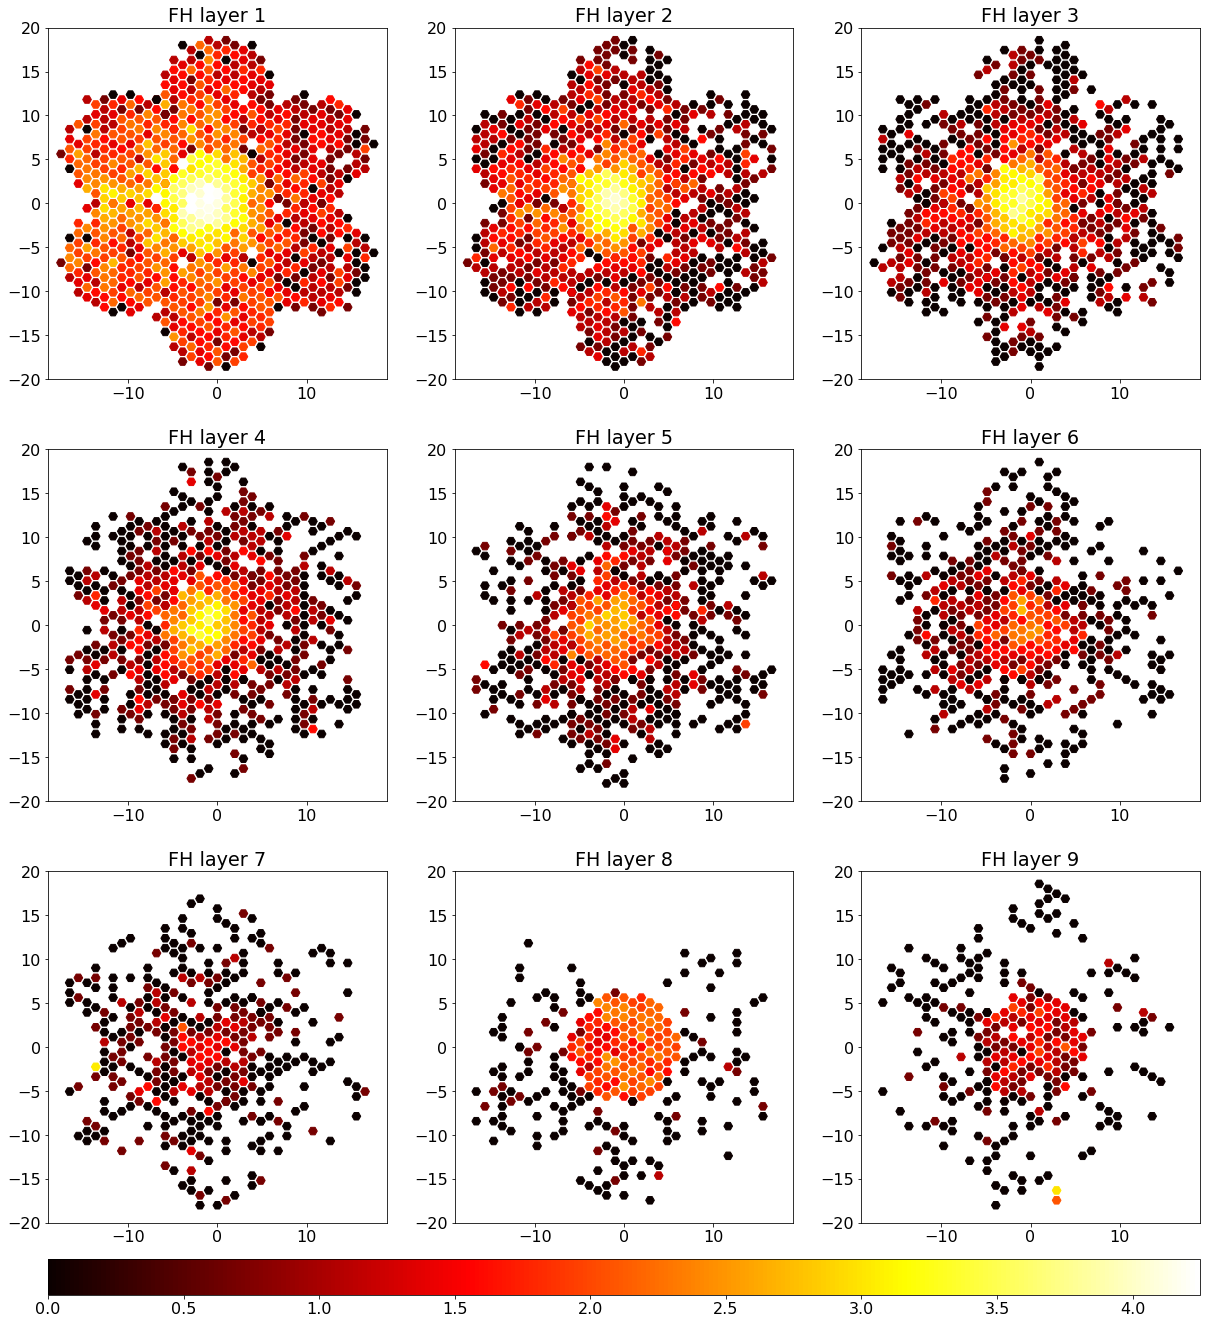

In [68]:
cmap = 'hot'
mstyle = 'H'

zval = 'rechit_energy'
#zval = 'rechit_module'
#zval = 'rechit_amplitudeLow'
#zval = 'tot_hit'

norm = plt.Normalize()

layers = range(29,38)
#layers = range(29,41)

div = int(np.round(np.sqrt(len(layers))))

nrows = len(layers)//div if len(layers)%div == 0 else len(layers)//div +1
ncols = div

fig, axs = plt.subplots(nrows,ncols,figsize = (20,20))

base_sel = df_all.rechit_energy > 2.5
#base_sel &= df_all.rechit_energy < 3
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))

for i,lay in enumerate(layers):
    
    ax = axs[i//div][i%div]

    #ax.set_title('Layer %i' % lay)
    ax.set_title('FH layer %i' % (lay-28))
    
    sel = base_sel & (df_all.rechit_layer == lay)
    
    #cnts = df_all[sel].groupby(['rechit_x','rechit_y'])['rechit_energy'].size().reset_index()
    cnts = df_all[sel].groupby(['rechit_x','rechit_y'])[zval].size().reset_index()

    c = np.log(cnts[zval])
    #c = cnts[zval]
    
    im = ax.scatter(cnts.rechit_x, cnts.rechit_y, c = c, marker = mstyle, s = 75, cmap = cmap, norm = norm)
    
    ax.set_xlim(-19,19)
    ax.set_ylim(-20,20)

fig.subplots_adjust(left=0.05, right=0.85, bottom = 0.05)
cbar_ax = fig.add_axes([0.05,0., 0.8, 0.025])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.show()

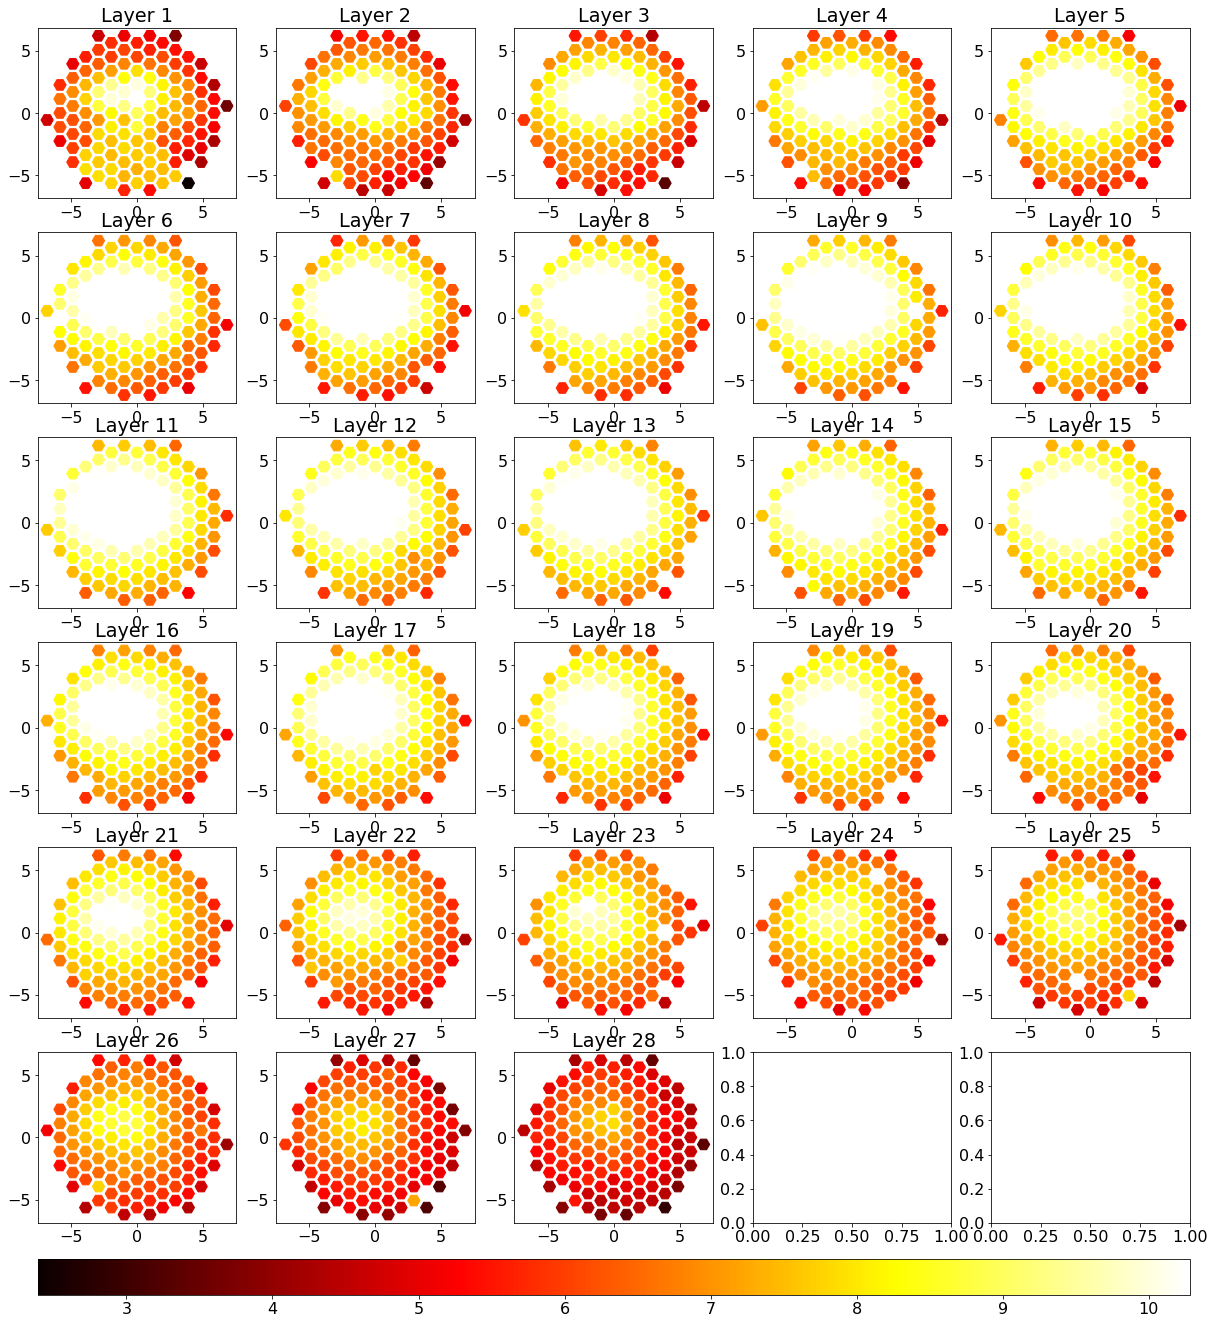

In [69]:
cmap = 'hot'
mstyle = 'H'

zval = 'rechit_energy'
#zval = 'rechit_module'
#zval = 'rechit_amplitudeLow'

norm = plt.Normalize()

layers = range(1,29)

div = int(np.round(np.sqrt(len(layers))))

fig, axs = plt.subplots(len(layers)//div+1,div,figsize = (20,20))

base_sel = df_all.rechit_energy > 1
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))

for i,lay in enumerate(layers):
    
    ax = axs[i//div][i%div]

    ax.set_title('Layer %i' % lay)
    
    sel = base_sel & (df_all.rechit_layer == lay)
    
    #cnts = df_all[sel].groupby(['rechit_x','rechit_y'])['rechit_energy'].size().reset_index()
    cnts = df_all[sel].groupby(['rechit_x','rechit_y'])[zval].sum().reset_index()

    c = np.log(cnts[zval])
    #c = cnts[zval]
    
    im = ax.scatter(cnts.rechit_x, cnts.rechit_y, c = c, marker = mstyle, s = 150, cmap = cmap, norm = norm)

fig.subplots_adjust(left=0.05, right=0.85, bottom = 0.05)
cbar_ax = fig.add_axes([0.05,0., 0.8, 0.025])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.show()

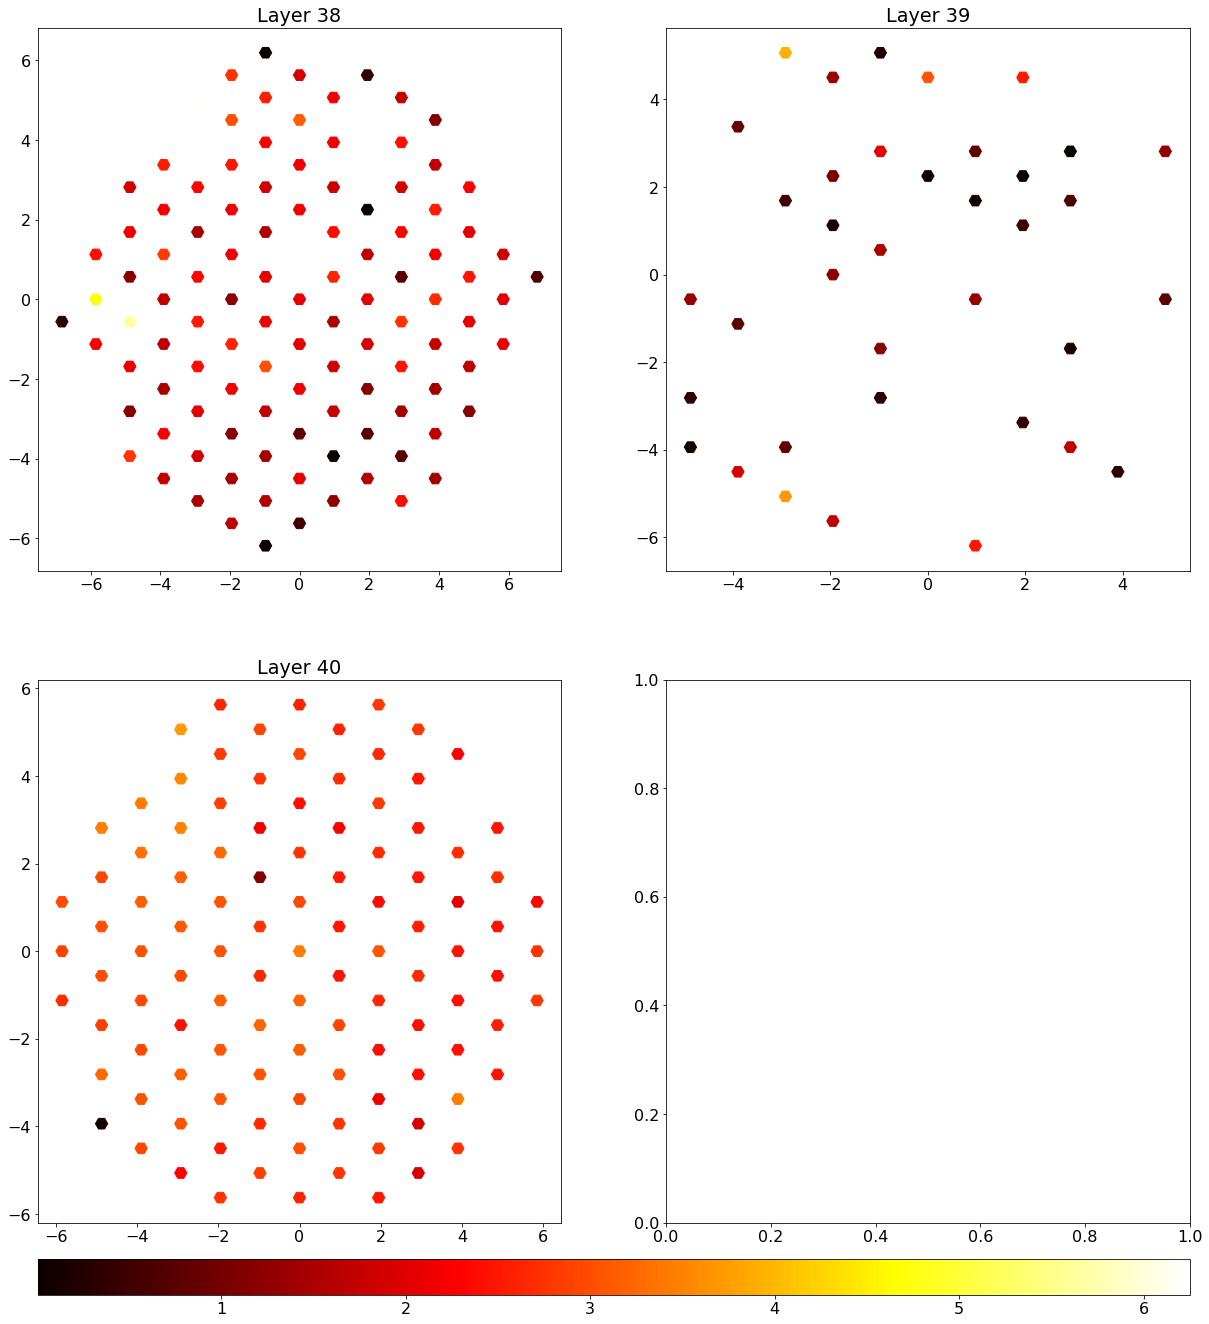

In [70]:
cmap = 'hot'
mstyle = 'H'

zval = 'rechit_energy'
#zval = 'rechit_module'
#zval = 'rechit_amplitudeLow'

norm = plt.Normalize()

layers = range(38,41)

div = int(np.round(np.sqrt(len(layers))))

fig, axs = plt.subplots(len(layers)//div+1,div,figsize = (20,20))

base_sel = df_all.rechit_energy > 1
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))

for i,lay in enumerate(layers):
    
    ax = axs[i//div][i%div]

    ax.set_title('Layer %i' % lay)
    
    sel = base_sel & (df_all.rechit_layer == lay)
    
    #cnts = df_all[sel].groupby(['rechit_x','rechit_y'])['rechit_energy'].size().reset_index()
    cnts = df_all[sel].groupby(['rechit_x','rechit_y'])[zval].sum().reset_index()

    c = np.log(cnts[zval])
    #c = cnts[zval]
    
    im = ax.scatter(cnts.rechit_x, cnts.rechit_y, c = c, marker = mstyle, s = 150, cmap = cmap, norm = norm)

fig.subplots_adjust(left=0.05, right=0.85, bottom = 0.05)
cbar_ax = fig.add_axes([0.05,0., 0.8, 0.025])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.show()

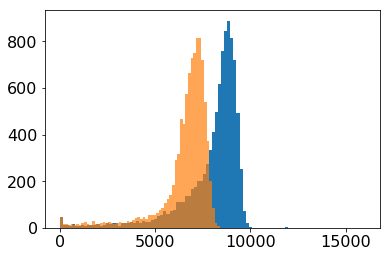

In [71]:
base_sel = df_all.rechit_energy > 1
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))
#base_sel &= df_all.rechit_toaRise == 4

r = plt.hist(df_all[base_sel].groupby('event')['rechit_energy'].sum(), 100)

base_sel = df_all.rechit_energy > 10
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))
#base_sel &= df_all.rechit_toaRise > 4

r = plt.hist(df_all[base_sel].groupby('event')['rechit_energy'].sum(), 100, alpha = 0.7)

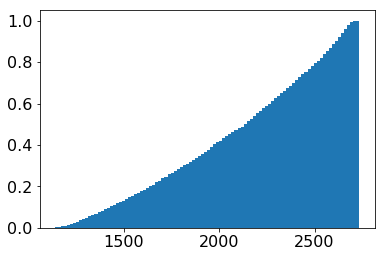

In [72]:
base_sel = df_all.rechit_energy > 50
base_sel &= ~((df_all.rechit_chip == 3) & (df_all.rechit_channel == 22 ))
base_sel &= df_all.rechit_toaRise > 4
base_sel &= df_all.rechit_layer == 10
base_sel &= df_all.rechit_chip == 2

mean_toa = df_all[base_sel].groupby('event')['rechit_toaRise'].mean()

r = plt.hist(mean_toa, 100, cumulative = True, density = True)

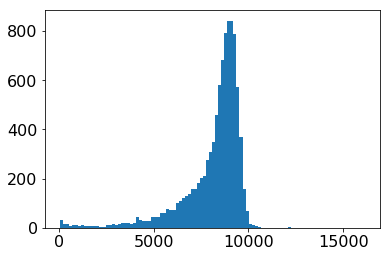

In [73]:
r = plt.hist(totE, 100)